# Reading Data from Web Sites

Many times you want to add external data to your analysis. External data is often found in external web sites, usually in the format of an HTML table. You can import HTML directly into Excel using _"Import"_.

In this notebook, we will learn how to use pandas _read_html_ to load tables from web site with ease, including cases where the data is complex to retrieve. 

## Loading HTML data

We will load a few tables from simple sites as well as complex ones

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

## Loading from simple web sites 

If you have a simple web page with a single table, you can pass the URL of the page to Pandas and call read_html. 

In [4]:
url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'
dfs = pd.read_html(url)

read_html is returning a list of all the tables in the page. If we pring the first element (index 0 in the list), we will get the first data frame/table in that page.

In [5]:
dfs[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020"
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020"
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001"
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001"
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001"
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000"


## Loading from complex web sites

Many times pages will be more complex and we can still extract the relevant data. 

In [6]:
url = 'https://ncov2019.live/data'
table_id = 'sortable_table_world'

Here we will look like a browser to the web site, as some web sites block their context to bots and crawlers. Since we are not hitting the web site a lot, pretending to be a browser is considered as acceptable usage. 

We will send to the web site a header that a browser is sending and get the reply of the page as text. The text (_r.text_) will be parsed by the _read_html_ function and create the dataframe. We will also add the HTML id of the table that we want. This id (_'sortable_table_world'_) can be found when using the _inspect_ option in Chrome, Safari, Firefox and other browsers. 

In [7]:

import requests

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)


df_list = pd.read_html(r.text, attrs={'id': table_id})


In [8]:
df_list[0]

,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population
0,TOTAL,42497381,5461,34027,0.08%,76534,1149367,148,664,0.06%,772575745,10199306,30943571,3976,7782475162
1,★ Afghanistan,40687,1038,0,0%,93,1507,38,0,0%,119323,5170,34010,868,39196742
2,★ Albania,18556,6450,0,0%,20,469,163,0,0%,111564,7621,10466,3638,2876803
3,★ Algeria,55630,1262,0,0%,33,1897,43,0,0%,Unknown,Unknown,38788,880,44095051
4,★ Andorra,4038,0,0,0%,22,69,0,0,0%,137457,1240,2729,0,77304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,★ Montserrat,13,0,0,0%,Unknown,1,0,0,0%,483,0,12,0,4993
213,★ Falkland Islands,13,0,0,0%,Unknown,Unknown,Unknown,0,0%,2682,Unknown,13,0,3511
214,★ Anguilla,3,0,0,0%,Unknown,Unknown,Unknown,0,0%,1329,Unknown,3,0,15045
215,★ Wallis and Futuna,1,0,0,0%,Unknown,Unknown,Unknown,0,0%,48,Unknown,1,0,11175


In [9]:
df = df_list[0]

## Simple Data Visualization

External data is often "messy", and it is a best practice to clean it up before staring to work with it. In the next cell we will make sure that the numeric columns are indeed numeric (removing "Unknown", for example). We will also resolve the conflict of having multiple columns with the same name ("Per Million", in this exammple), and translate to more meaningful names.

<AxesSubplot:xlabel='Name'>

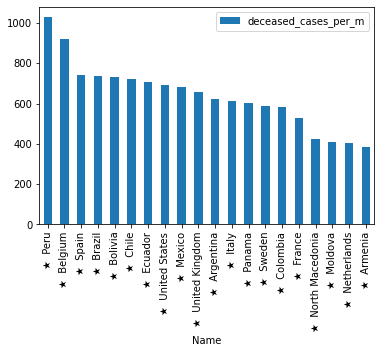

In [10]:
(
    df
    .assign(confirmed_cases_per_m=lambda x: pd.to_numeric(x['Per Million'],  errors='coerce'))
    .assign(deceased_cases_per_m=lambda x: pd.to_numeric(x['Per Million.1'],  errors='coerce'))
    .fillna(0)
    # .info()
    .sort_values(by='deceased_cases_per_m',ascending=False)
    .iloc[:20,:]
    .plot
    .bar(x='Name', y=['deceased_cases_per_m'])
)

## More examples

### Using Functions 

Functions are a more complicated topic and you are not expected to write functions most of the times. Functions are also available in Excel as Macros. You should be familiar with using functions, read them to understand what they do, and also modifying them to fit your needs.

We often find the a set of commands is repeating itself many times in our analyses. This is the time to wrap these commands as a function. In the next cell, we will create a function that is wrapping a few of the commands that we used in the previous cells such as adding the header, choosing a specific index of a table and setting the first row as header.

In [11]:
def get_table_from_html(url, attrs=None, index=0):
    r = requests.get(url, headers=header)
    df_list = pd.read_html(r.text, attrs=attrs)
    df = df_list[index]
    df.columns = df.iloc[0]
    df = df[1:]
    return df

Once we have the function defined (_def_), we can try it in a simple way. Let's say that we want to add to our CRM (Customer Relationship Management) system a new target market, as the consumer good companies (CPG). We find in the web a table with the top CPG companies for 2019. 

In [12]:
url_top_companies = 'https://consumergoods.com/top-100-consumer-goods-companies-2019'
df = get_table_from_html(url_top_companies)

Let's look at the table

In [13]:
df.style

0,Rank/Company,Net Revenue ($M),1-Year Sales Growth,Key Product Categories
1,1. Nestle SA*,"$92,085",2.10%,"Food, Beverage, Confectionery"
2,2. Procter & Gamble,"$66,832",2.70%,"Household Goods, Health & Beauty Aids, OTC Pharma"
3,3. PepsiCo,"$64,661",1.80%,"Food, Beverage"
4,4. Unilever N.V.*,"$56,188",-5.10%,"Household Goods, Food, Health & Beauty Aids"
5,5. Anheuser-Busch InBev,"$54,619",-3.20%,Wine & Spirits
6,6. Christian Dior*,"$51,607",7.20%,"Apparel/Footwear/Accessories, Wine & Spirits, Health & Beauty Aids"
7,7. LVMH Moët Hennessy Louis Vuitton*,"$51,607",9.80%,"Apparel/Footwear/Accessories, Wine & Spirits, Health & Beauty Aids"
8,8. JBS S.A.*,"$44,587",11.30%,Food
9,9. Tyson Foods,"$40,052",4.70%,Food
10,10. Nike Inc.,"$36,397",6.00%,Apparel/Footwear/Accessories


### Cleaning the data

We see that the table has a column with both the rank and the name of the company, and we want to have only the name of company in a column (as we have the rank in the index of the table). There are a fwe options to do it using string functions such as _RIGHT_ or _LEFT_. In this case, you could use:

```excel
RIGHT(cell,LEN(cell)-SEARCH("char", cell))
```

In this example, we will use a powerful tool of regular expression (regex). We will not dive into the syntax of regex now, and it time you will find it easier to read or even write. 

In [14]:
clean_names_df = (
    df
    .assign(company_name = lambda x : x['Rank/Company'].str.extract(r'\d+. ([^*]*)[*]?'))
)

The next manipulation that we want to do is to have a numeric column with the annual revenues. The data in the table is in millions (which is better for presentation purposes). We will run two manipulations on the data, the first to remove the dollar sign (_$_) and the comma (_,_), and the second to multiply it by a million to get the scaled value.

In [15]:
clean_names_df = (
    clean_names_df
    .assign(annual_num = lambda x : x['Net Revenue ($M)'].replace('[\$,]', '', regex=True))
    .assign(annual_revenues = lambda x : pd.to_numeric(x.annual_num)*10**6)
)

In [16]:
clean_names_df.head()

,Rank/Company,Net Revenue ($M),1-Year Sales Growth,Key Product Categories,company_name,annual_num,annual_revenues
1,1. Nestle SA*,"$92,085",2.10%,"Food, Beverage, Confectionery",Nestle SA,92085,92085000000
2,2. Procter & Gamble,"$66,832",2.70%,"Household Goods, Health & Beauty Aids, OTC Pharma",Procter & Gamble,66832,66832000000
3,3. PepsiCo,"$64,661",1.80%,"Food, Beverage",PepsiCo,64661,64661000000
4,4. Unilever N.V.*,"$56,188",-5.10%,"Household Goods, Food, Health & Beauty Aids",Unilever N.V.,56188,56188000000
5,5. Anheuser-Busch InBev,"$54,619",-3.20%,Wine & Spirits,Anheuser-Busch InBev,54619,54619000000


### Enriching the data

The next column we want to add to our table before importing it to our CRM system is domain of the company. We will need to use for it a search engine such as Google and a python library that is wrapping it to make it easy for us to use it. First, let's install the python library:


In [17]:
pip install google

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Now, let's try it on one of the company names

In [18]:
from googlesearch import search
for url in search('Nestle', stop=1):
    print(url)

https://www.nestle.com/


The above cell is using a powerful concept in programming called _for-loop_ or _list-comprehesion_. However, we will try to minimize this programming concept and convert it to a simpler command that is returning the first value

In [19]:
next(search('Hasbro Inc.', stop=1),'Nope')

'https://shop.hasbro.com/en-us'

#### Search Domain Function

Now we can see the following function that will return to us the domain name of every company we will call it. The function is using various complicated concepts such as regex that we already saw, and _try-except_ part which is used to handle errors (what happened if we don't find a domain name). The function is also waiting 20 seconds before calling the search engine to avoid exceeding some limits that systems are putting against bots (which we just created). The _sleep_ will make the actual run of the data much longer, but it is still automated and we don't need to run this repeative task manually.


For now, we don't need to understand these details.

In [20]:
import re
import time

def search_domain(company_name):
    print(str(company_name))
    time.sleep(20)
    try: 
        domain = next(search(str(company_name)+' website', stop=1))
        print(domain)
        m = re.search('https?://.*?\.?([0-9a-z-]+\.co[^/]+)/.*', domain)
        answer = m.group(1) 
    except:
        answer = 'NA'
    return answer

Let's test it with one of the compamy names

In [21]:
search_domain('3M co.')

3M co.
https://www.3m.com/


'3m.com'

Now it is time to call our _search\_domain_ function on all the rows in our table. This will take an hour or so, due to our _sleep_ time between the calls. For now, let's run it only on the head (first 5) of the table.

In [23]:
clean_names_df_head = clean_names_df.head()
clean_names_df_head['domain'] = clean_names_df_head.company_name.apply(search_domain)
# clean_names_df['domain'] = clean_names_df.company_name.apply(search_domain)

Nestle SA
https://www.nestle.com/
Procter & Gamble
https://us.pg.com/
PepsiCo
https://www.pepsico.com/
Unilever N.V.
https://www.unilever.com/
Anheuser-Busch InBev
https://www.ab-inbev.com/


In [24]:
clean_names_df_head

,Rank/Company,Net Revenue ($M),1-Year Sales Growth,Key Product Categories,company_name,annual_num,annual_revenues,domain
1,1. Nestle SA*,"$92,085",2.10%,"Food, Beverage, Confectionery",Nestle SA,92085,92085000000,nestle.com
2,2. Procter & Gamble,"$66,832",2.70%,"Household Goods, Health & Beauty Aids, OTC Pharma",Procter & Gamble,66832,66832000000,pg.com
3,3. PepsiCo,"$64,661",1.80%,"Food, Beverage",PepsiCo,64661,64661000000,pepsico.com
4,4. Unilever N.V.*,"$56,188",-5.10%,"Household Goods, Food, Health & Beauty Aids",Unilever N.V.,56188,56188000000,unilever.com
5,5. Anheuser-Busch InBev,"$54,619",-3.20%,Wine & Spirits,Anheuser-Busch InBev,54619,54619000000,ab-inbev.com


### Writing to CSV/Excel file

Once we finished our table creation, we can write it as a file that we can later import to our CRM system.

In [50]:
clean_names_df.to_csv('top_100_cpg_companies.csv',index=False)